In [ ]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from keras.models import load_model
from sklearn.metrics import r2_score

# Load Data

In [2]:
element_list = ['H', 'He', 'Li', 'Be', 'B', 'C', 'N', 'O', 'F', 'Ne', 'Na', 'Mg', 'Al', 'Si', 'P', 'S', 'Cl', 'Ar', 'K', 'Ca', 'Sc', 'Ti', 'V', 'Cr','Mn', 'Fe', 'Co', 'Ni', 'Cu', 'Zn', 'Ga', 'Ge', 'As', 'Se', 'Br', 'Kr', 'Rb', 'Sr', 'Y', 'Zr', 'Nb', 'Mo', 'Tc', 'Ru', 'Rh', 'Pd', 'Ag', 'Cd', 'In', 'Sn', 'Sb', 'Te', 'I', 'Xe', 'Cs', 'Ba', 'La', 'Ce', 'Pr', 'Nd', 'Pm', 'Sm', 'Eu', 'Gd', 'Tb', 'Dy', 'Ho', 'Er', 'Tm', 'Yb', 'Lu', 'Hf', 'Ta', 'W', 'Re', 'Os', 'Ir', 'Pt', 'Au', 'Hg', 'Tl', 'Pb', 'Bi', 'Ac', 'Th', 'Pa', 'U', 'Np', 'Pu']
df_test = pd.read_csv('../Data/oqmd_test.csv')

## Convert string representation of molecular formula to one-hot encoding

In [3]:
def counts2vector(pairs):
    vec = [0]*len(element_list)
    for pair in pairs:
        vec[element_list.index(pair[0])]+=int(pair[1])
    vec = np.array(vec)
    return vec

def onehot(enc):
    rep = np.zeros((len(element_list),11))
    rep[:,0] = 1
    for i,val in enumerate(enc):
        if val!=0:
            rep[i][0]=0
            rep[i][val]=1
    return rep.flatten()

def encode(df):
    formulae = df[['comp']]
    counts = pd.Series(formulae.values.flatten()).str.findall(r"([a-z]+)([0-9]+)", re.I)
    df['encoding'] = counts.apply(counts2vector)
    df['onehot'] = df['encoding'].apply(onehot)

In [4]:
encode(df_test)

## Extract the encoding and target values

In [5]:
X_test = df_test.onehot.values
X_test = np.stack(X_test,axis=0)
y_test = df_test[['delta_e','volume_pa','energy_pa']].values

# Load Predictor Models

In [ ]:
pred_delta_e = load_model('delta_e_best_model.h5')
pred_energy_pa = load_model('energy_pa_best_model.h5')
pred_volume_pa =load_model('volume_pa_best_model.h5')

# Predict properties of Test Set

In [7]:
y_pred_delta_e = pred_delta_e.predict(X_test)
y_pred_volume = pred_volume_pa.predict(X_test)
y_pred_energy = pred_energy_pa.predict(X_test)

# Plot Predictions vs Ground Truth

## Set plot parameters

In [8]:
plt.rc('xtick', labelsize=90)
plt.rc('xtick.major', size=40, width=6, pad=30)
plt.rc('ytick.major', size=40, width=6, pad=30)
plt.rc('ytick', labelsize=90)
plt.rc('axes',linewidth=6, labelsize=75, labelpad=30)


## Formation Enthalpy

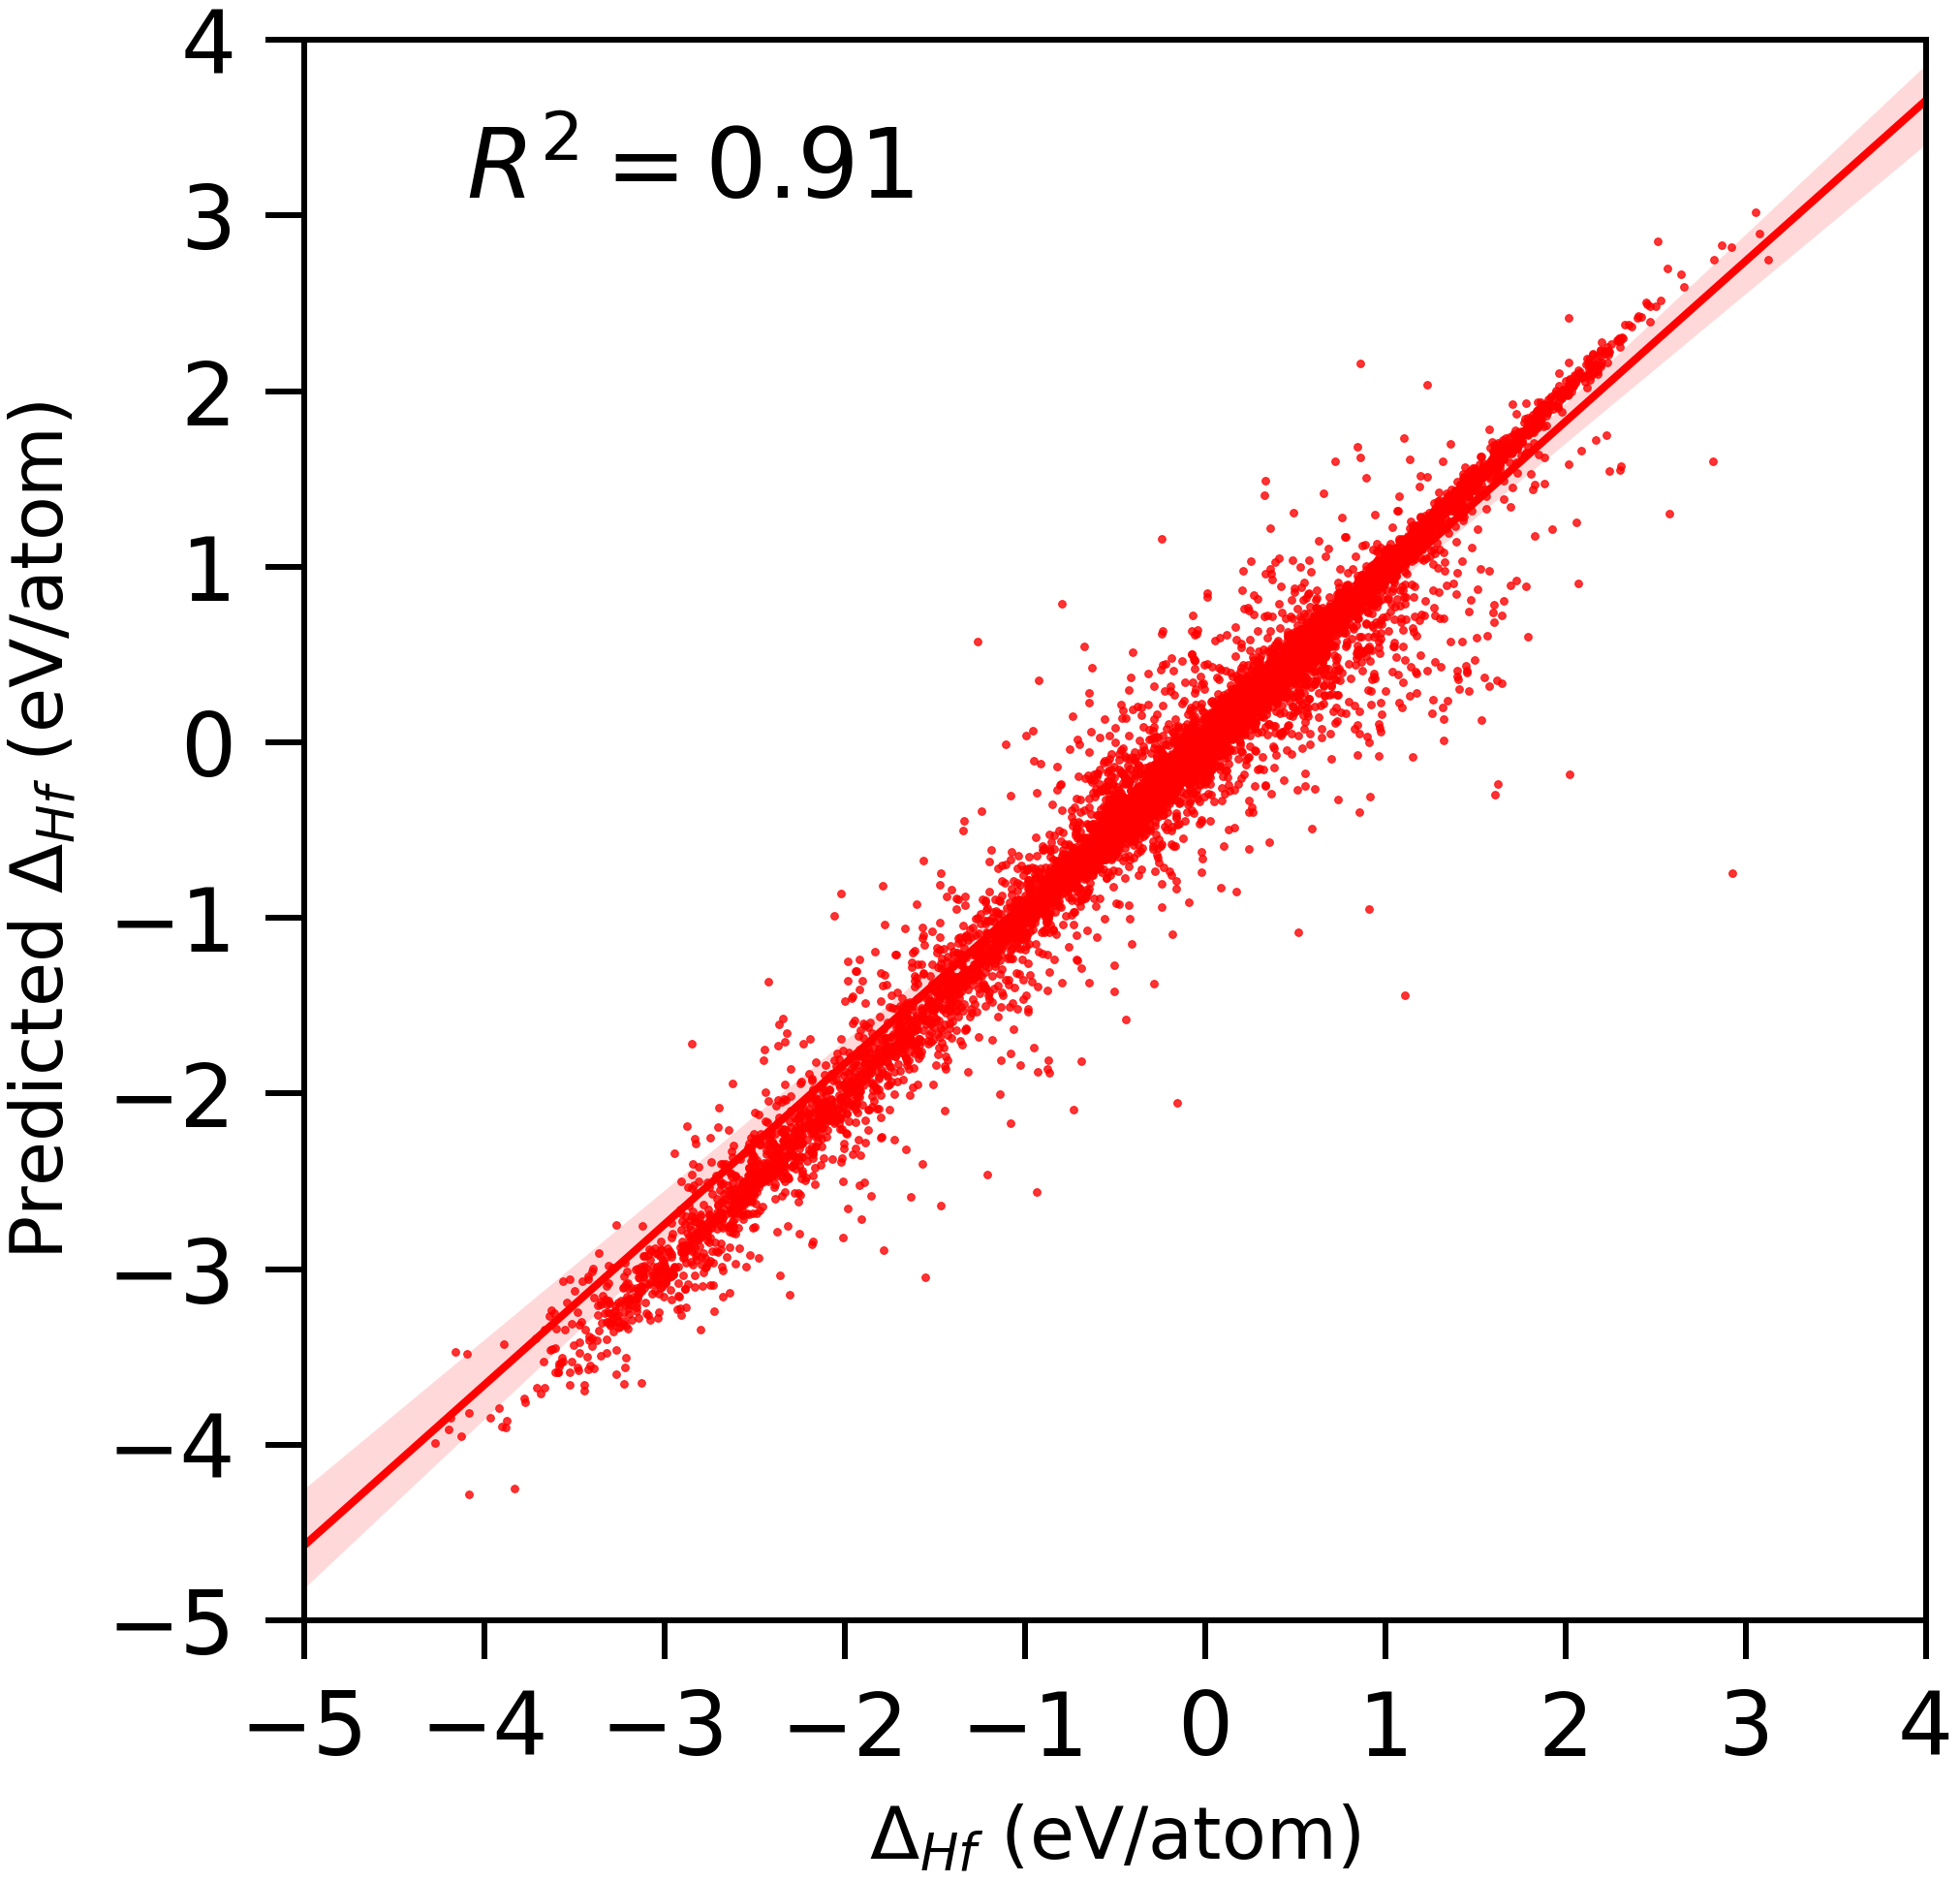

In [9]:
fig, ax = plt.subplots(1,1,figsize=(30,30))
sns.regplot(y_test[:,0], y_pred_delta_e, scatter_kws={'s':60},color='r', line_kws={'linewidth':8}, truncate=False)
plt.xlim(-5,4)
plt.ylim(-5,4)
r2 = r2_score(y_test[:,0], y_pred_delta_e)
plt.text(0.1,0.9,r"$R^2 = $" + str(r2.round(2)),transform = ax.transAxes, size=100)
plt.xlabel(r'$\Delta_{Hf}$ (eV/atom)')
plt.ylabel(r'Predicted $\Delta_{Hf}$ (eV/atom)')
plt.xticks(range(-5,5))
plt.show()

## Volume per Atom

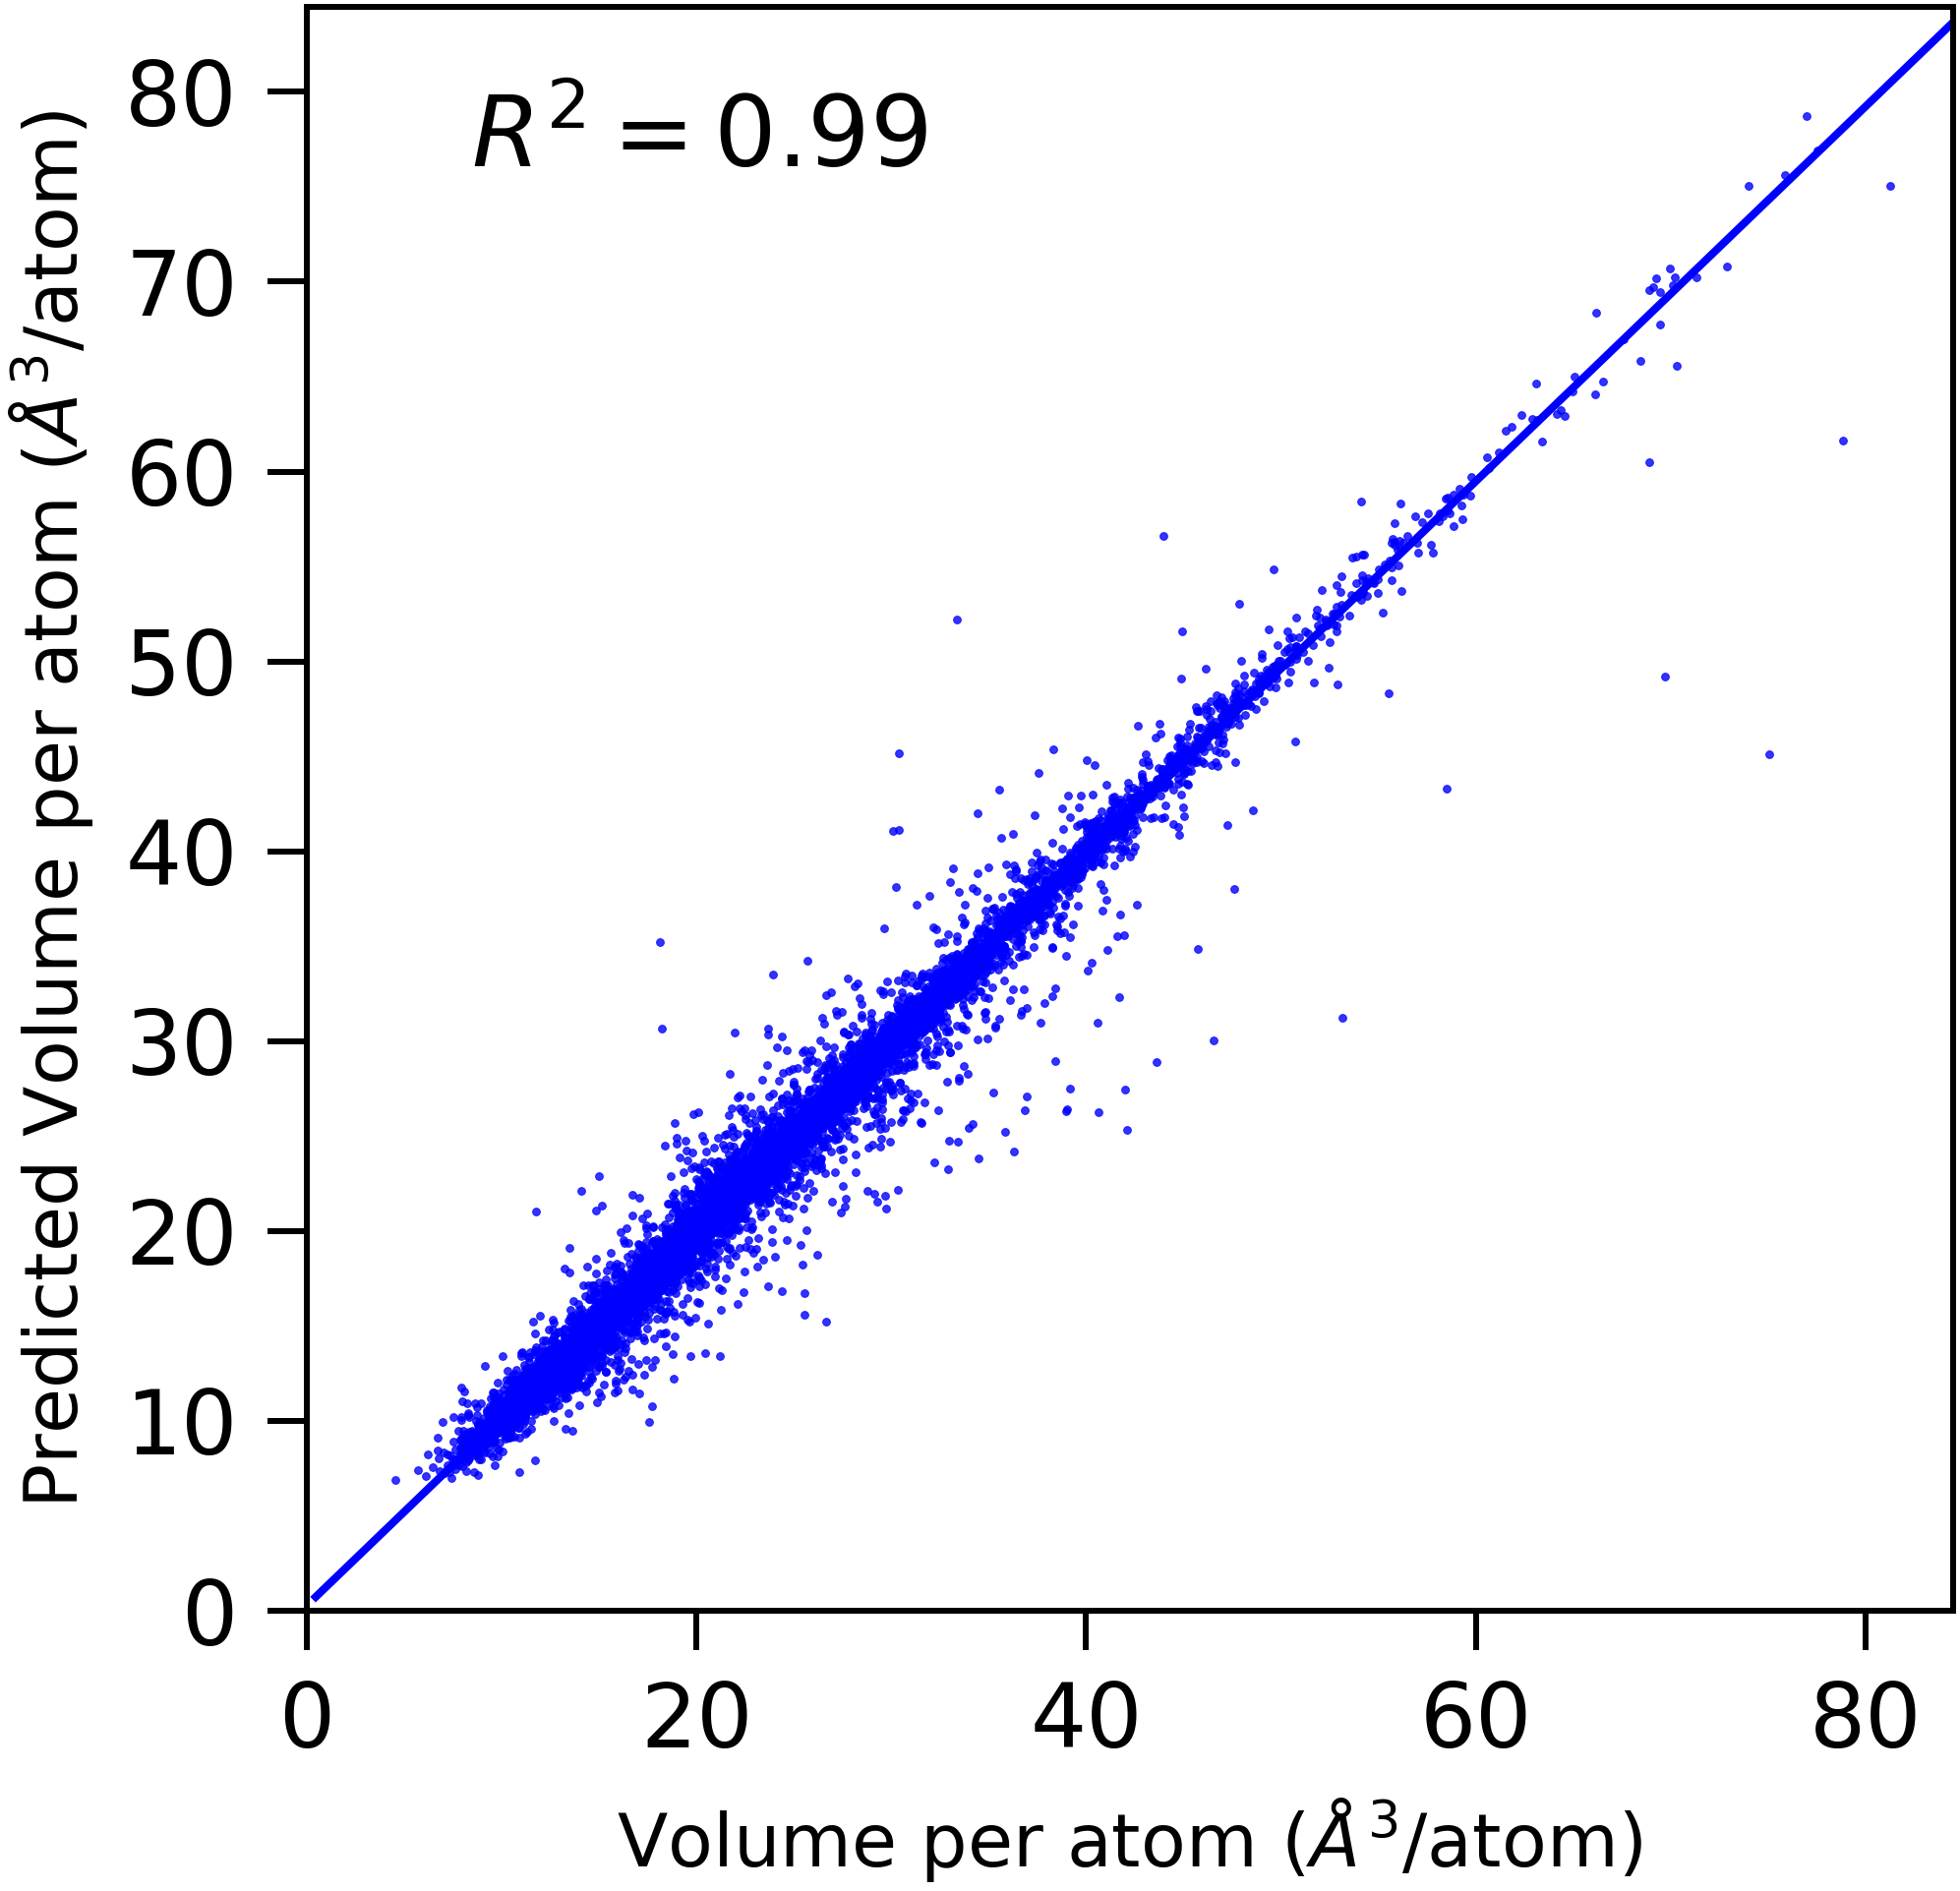

In [10]:
fig, ax = plt.subplots(1,1,figsize=(30,30))
sns.regplot(y_test[:,1], y_pred_volume, scatter_kws={'s':60},color='b', line_kws={'linewidth':8}, truncate=False)
r2 = r2_score(y_test[:,1], y_pred_volume)
plt.text(0.1,0.9,r"$R^2 = $" + str(r2.round(2)),transform = ax.transAxes, size=100)
plt.xlabel(r"Volume per atom ($\AA^3$/atom)")
plt.ylabel(r"Predicted Volume per atom ($\AA^3$/atom)")
plt.xlim(0,y_pred_volume.max())
plt.ylim(0,y_pred_volume.max())
plt.show()

## Energy per Atom

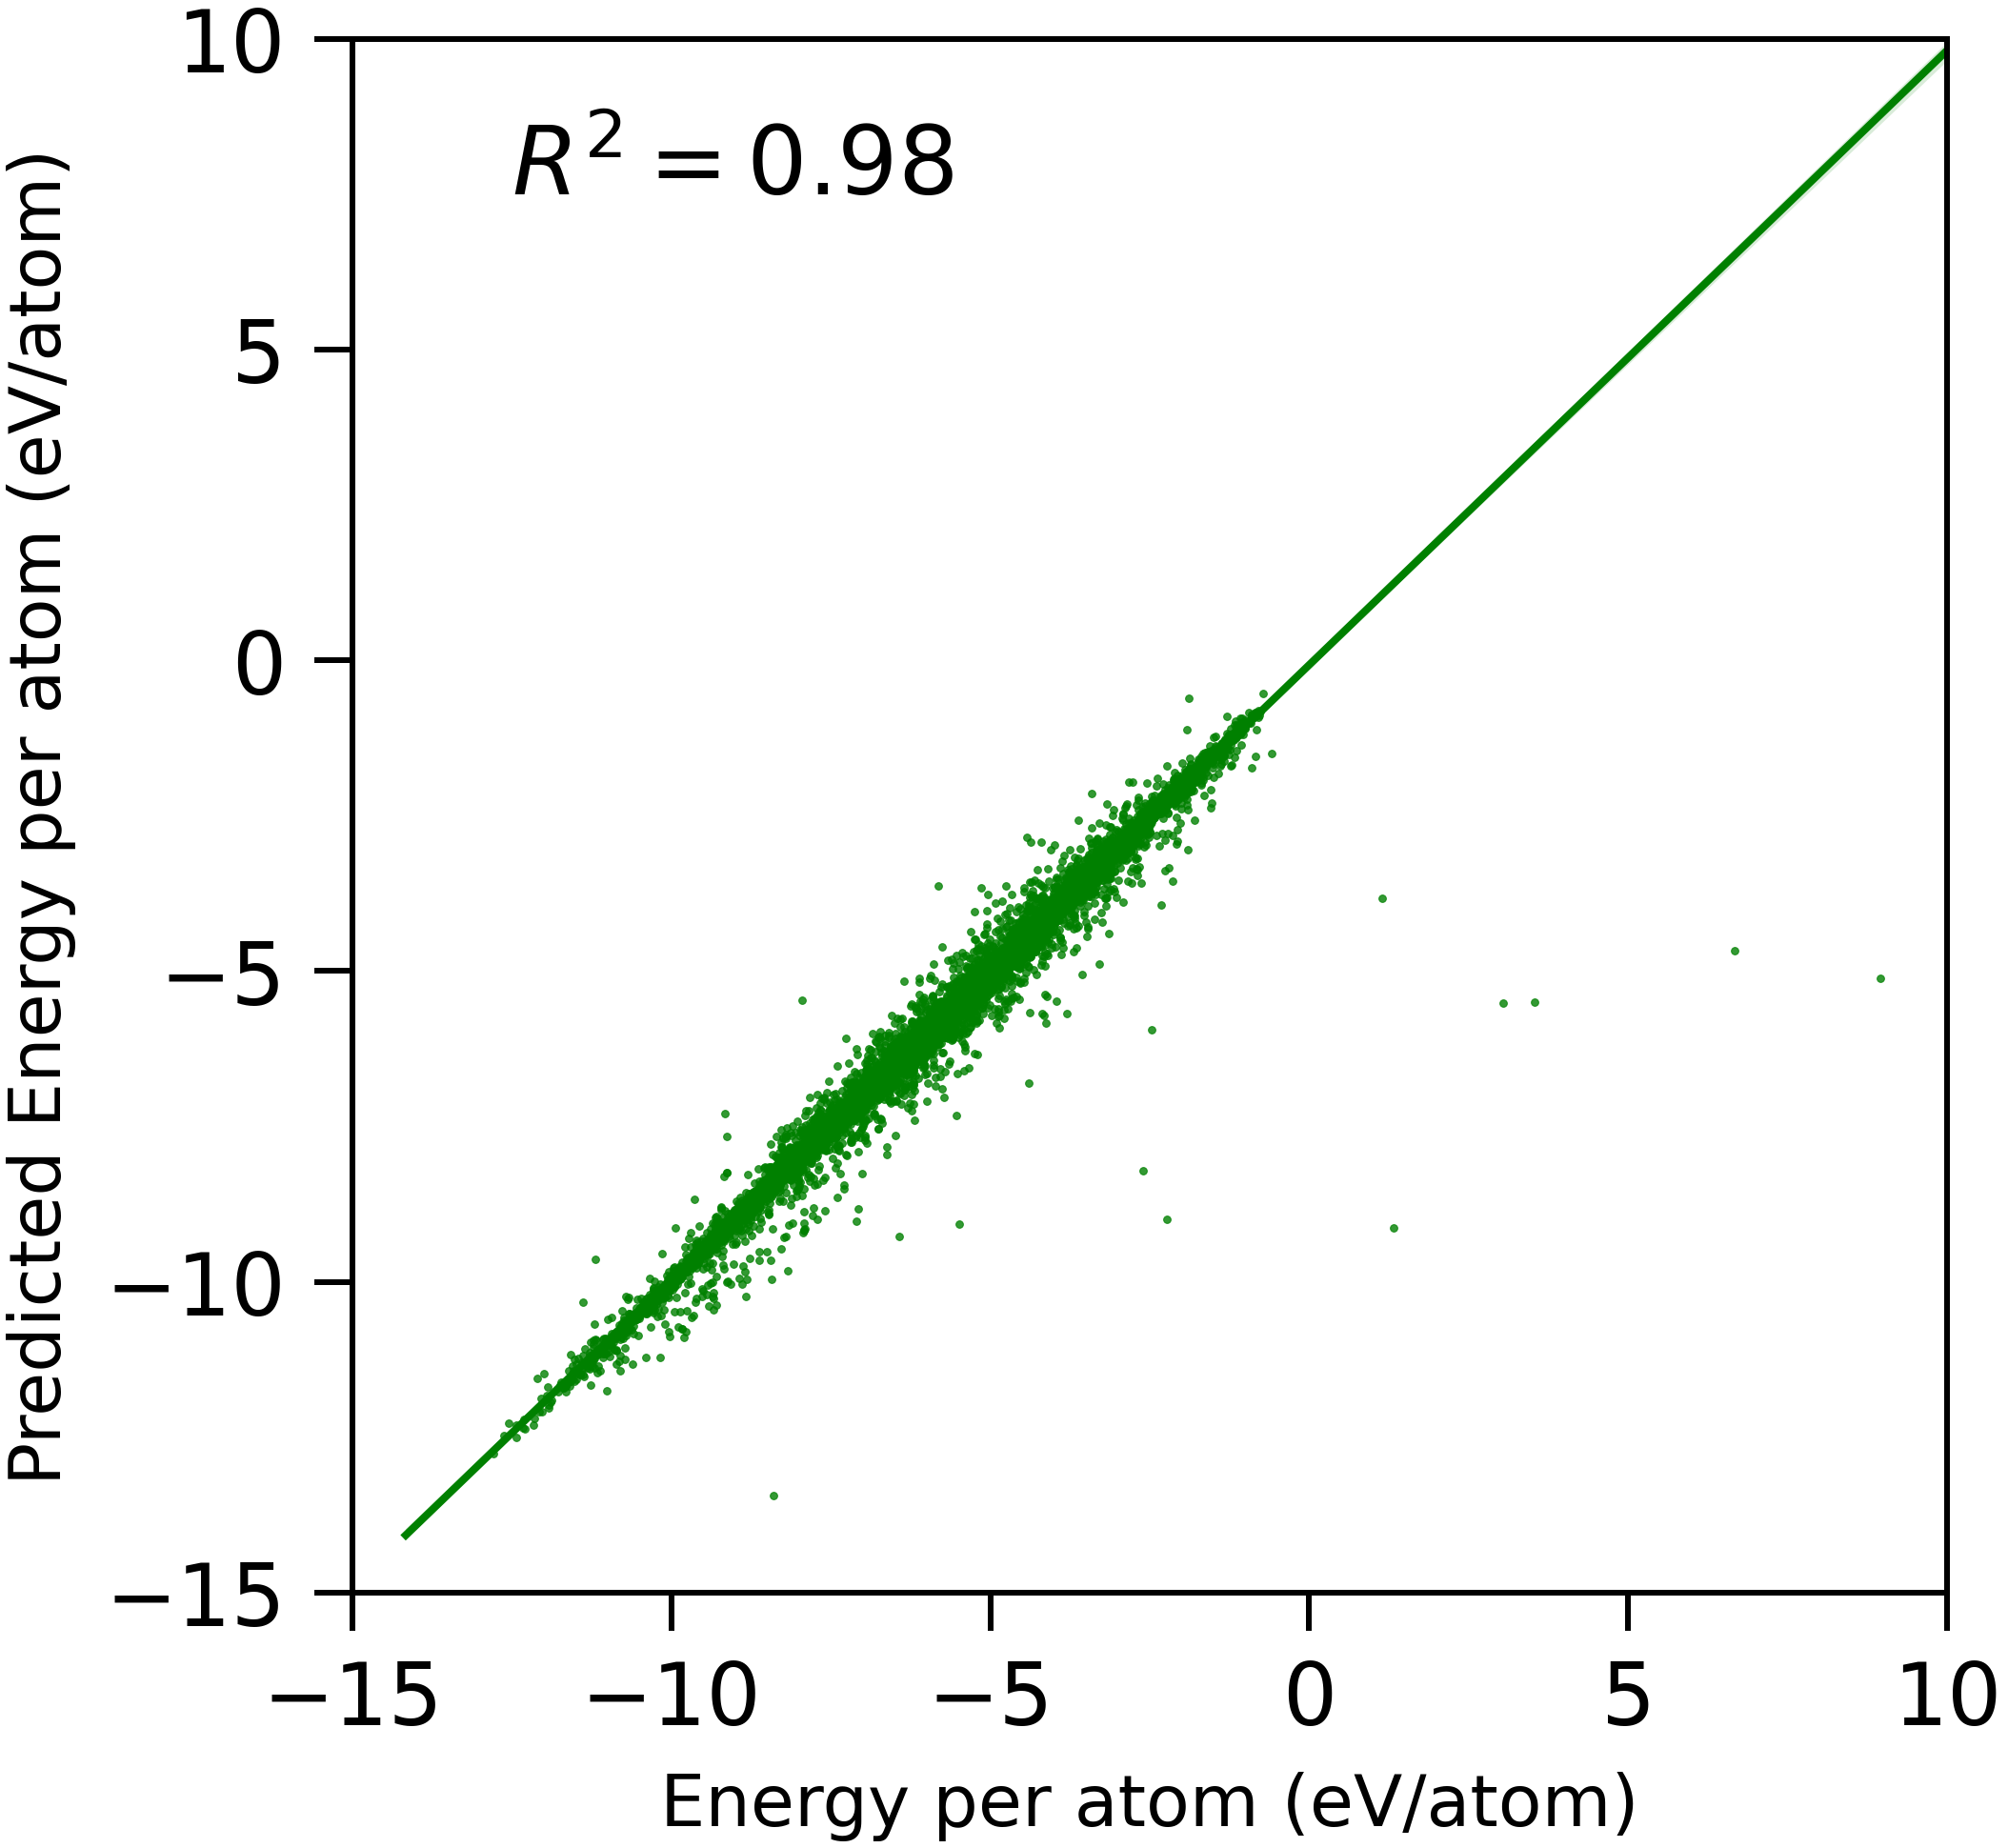

In [11]:
fig, ax = plt.subplots(1,1,figsize=(30,30))
sns.regplot(y_test[:,2], y_pred_energy, scatter_kws={'s':60},color='g', line_kws={'linewidth':8}, truncate=False)
plt.xlim(-15,10)
plt.ylim(-15,10)
r2 = r2_score(y_test[:,2], y_pred_energy)
plt.text(0.1,0.9,r"$R^2 = $" + str(r2.round(2)),transform = ax.transAxes, size=100)
plt.xlabel(r"Energy per atom (eV/atom)")
plt.ylabel(r"Predicted Energy per atom (eV/atom)")
plt.show()